# Asteroid

In [ ]:
!pip install -U asteroid


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/156.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 45.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for torch-stoi: filename=torch_stoi-0.1.2-py3-none-any.whl size=6184 sha256=f6f1948bbfddc1788868e614370ad1420e5be69b514076a2a92

In [ ]:
!wget https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav

--2023-10-20 03:36:03--  https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav
Resolving www.merl.com (www.merl.com)... 137.203.190.5
Connecting to www.merl.com (www.merl.com)|137.203.190.5|:443... connected.
ERROR: cannot verify www.merl.com's certificate, issued by ‘CN=DigiCert Global G2 TLS RSA SHA256 2020 CA1,O=DigiCert Inc,C=US’:
  Unable to locally verify the issuer's authority.
To connect to www.merl.com insecurely, use `--no-check-certificate'.


In [ ]:
from IPython.display import display, Audio
import librosa as lb

In [ ]:
audio, sr = lb.load("female-female-mixture.wav")

In [ ]:
display(Audio("female-female-mixture.wav"))

In [ ]:
!asteroid-infer "mpariente/DPRNNTasNet-ks2_WHAM_sepclean" --files female-female-mixture.wav
!echo "-----"
!ls

pytorch_model.bin: 100% 14.7M/14.7M [00:00<00:00, 75.3MB/s]
-----
female-female-mixture_est1.wav	female-female-mixture.wav
female-female-mixture_est2.wav	sample_data


In [ ]:
display(Audio("female-female-mixture_est1.wav"))
display(Audio("female-female-mixture_est2.wav"))

In [ ]:
from asteroid.models import BaseModel
import soundfile as sf

model = BaseModel.from_pretrained("mpariente/DPRNNTasNet-ks2_WHAM_sepclean")

mixture, _ = sf.read("female-female-mixture.wav", dtype="float32", always_2d=True)

mixture = mixture.transpose()
mixture = mixture.reshape(1, mixture.shape[0], mixture.shape[1])
out_wavs = model.separate(mixture)

model.separate("female-female-mixture.wav")

/usr/local/lib/python3.10/dist-packages/asteroid/separate.py:148: UserWarning: File female-female-mixture_est1.wav already exists, pass `force_overwrite=True` to overwrite it
  warnings.warn(


# Visualizing the results

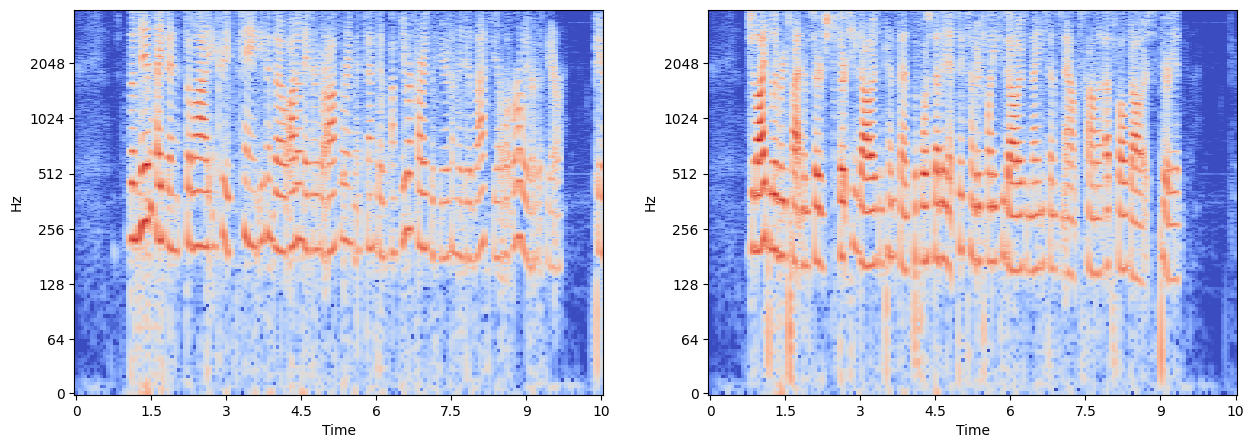

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


def show_magspec(waveform, **kw):
    return librosa.display.specshow(
        librosa.amplitude_to_db(np.abs(librosa.stft(waveform))),
        y_axis="log", x_axis="time",
        **kw
    )


est1 = sf.read("female-female-mixture_est1.wav")[0]
est2 = sf.read("female-female-mixture_est2.wav")[0]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
show_magspec(est1, sr=8000, ax=ax[0])
show_magspec(est2, sr=8000, ax=ax[1])

# Traning the model

- Asteriod is based on Pytorch and Pytorch-Lightning

In [ ]:
!pip install -U asteroid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/156.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for torch-stoi: filename=torch_stoi-0.1.2-py3-none-any.whl size=6184 sha256=8ba4ad83b1b8c47dade7b93950b7056ef4408d2568ca01c45f

In [ ]:
from torch import optim
from pytorch_lightning import Trainer
from asteroid.models import DPRNNTasNet
from asteroid.losses import pairwise_neg_sisdr, PITLossWrapper

from asteroid.data import LibriMix
from asteroid.engine import System

In [ ]:
train_loader, val_loader = LibriMix.loaders_from_mini(task="sep_clean", batch_size=16)
model = DPRNNTasNet(n_src=2)

loss = PITLossWrapper(pairwise_neg_sisdr, pit_from="pw_mtx")

optimizer = optim.Adam(model.parameters(), lr=1e-3)
system = System(model, optimizer, loss, train_loader, val_loader)

trainer = Trainer(max_epochs=1)
trainer.fit(system)

Drop 0 utterances from 800 (shorter than 3 seconds)
Drop 0 utterances from 200 (shorter than 3 seconds)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model     | DPRNNTasNet    | 3.7 M 
1 | loss_func | PITLossWrapper | 0     
---------------------------------------------
3.7 M     Trainable params
0         Non-trainable params
3.7 M     Total params
14.611    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
